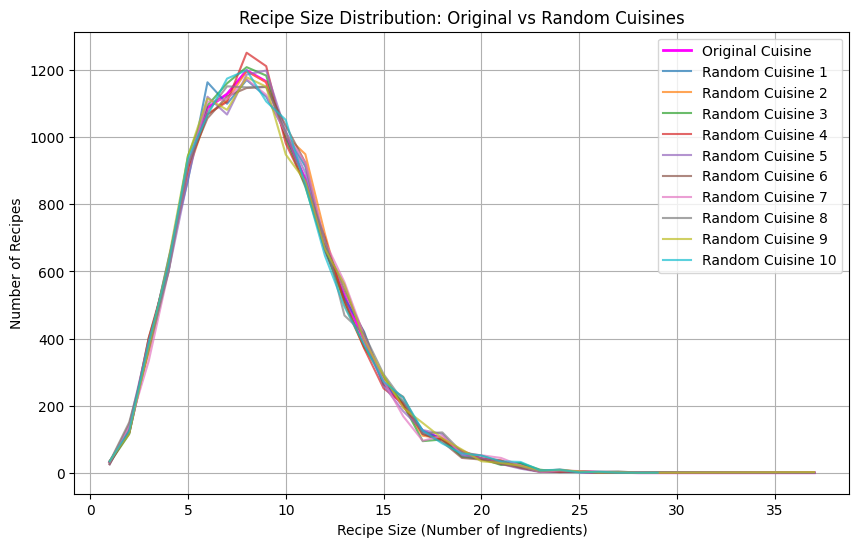

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('recipe_data.csv')
recipe_sizes = df.groupby('ID').size()
size_counts = recipe_sizes.value_counts().sort_index()
num_cuisines = 10
num_recipes = len(recipe_sizes)
ingredient_basket = df['Ingredient Name'].unique()
plt.figure(figsize=(10, 6))
plt.plot(size_counts.index, size_counts.values, label='Original Cuisine', color='magenta', linewidth=2)

for i in range(num_cuisines):
    random_recipe_sizes = np.random.choice(size_counts.index, size=num_recipes, p=size_counts.values / size_counts.sum())
    random_size_counts = pd.Series(random_recipe_sizes).value_counts().sort_index()
    plt.plot(random_size_counts.index, random_size_counts.values, label=f'Random Cuisine {i+1}', alpha=0.7)
plt.title('Recipe Size Distribution: Original vs Random Cuisines')
plt.xlabel('Recipe Size (Number of Ingredients)')
plt.ylabel('Number of Recipes')
plt.legend()
plt.grid(True)
plt.savefig('recipe_size_distribution.png')
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random

df = pd.read_csv('recipe_data.csv')

def get_ingredient_freq(df):
    return Counter(df['Ingredient Name'])

def create_random_cuisine(ingredient_freq, num_recipes):
    ingredients = list(ingredient_freq.keys())
    weights = list(ingredient_freq.values())
    random_cuisine = []
    for _ in range(num_recipes):
        recipe_size = random.randint(1, 10)  
        recipe = random.choices(ingredients, weights=weights, k=recipe_size)
        random_cuisine.extend(recipe)
    return random_cuisine

def plot_freq_rank(data):
    freq = Counter(data)
    sorted_freq = sorted(freq.values(), reverse=True)
    ranks = range(1, len(sorted_freq) + 1)
    return ranks, sorted_freq

original_freq = get_ingredient_freq(df)
num_random_cuisines = 10
random_cuisines = [create_random_cuisine(original_freq, len(df)) for _ in range(num_random_cuisines)]

plt.figure(figsize=(10, 6))
ranks, freq = plot_freq_rank(df['Ingredient Name'])
plt.loglog(ranks, freq, label='Original Cuisine', color='blue')
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Frequency-Rank Distribution of Original Cuisine')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.savefig('frequency_rank_distribution_original.png', dpi=300, bbox_inches='tight')
plt.close()

plt.figure(figsize=(10, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, num_random_cuisines))
for i, (cuisine, color) in enumerate(zip(random_cuisines, colors)):
    ranks, freq = plot_freq_rank(cuisine)
    plt.loglog(ranks, freq, label=f'Random Cuisine {i+1}', color=color)
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Frequency-Rank Distribution of 10 Random Cuisines')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.tight_layout()
plt.savefig('frequency_rank_distribution_random.png', dpi=300, bbox_inches='tight')
plt.close()

print("Plots have been saved as 'frequency_rank_distribution_original.png' and 'frequency_rank_distribution_random.png'")

Plots have been saved as 'frequency_rank_distribution_original.png' and 'frequency_rank_distribution_random.png'


### Frequency controlled Random cuisine with higher ranks
The main reason for this is, when creating frequency-controlled random cuisines, we typically use the frequencies of individual ingredients from the original cuisine to generate new random recipes. This process usually "average out" the occurrences of ingredients based on their individual frequencies. Rare combinations that exist in the original cuisine due are much less likely to occur randomly.